# BBC News Category Classification
### By Fahmi Jabbar (rootmawar77@gmail.com)
---
**Disclaimer :** Any code below is done by purposed to complete *Dicoding* Submission and made 100% by myself  

This submission is using pre-trained embedding words(GloVe)

---
**Dataset Information** : 

![Dataset Information](https://image.prntscr.com/image/Sstl7kwXTD2dmfkPyCrwAg.png)

Link : https://www.kaggle.com/yufengdev/bbc-fulltext-and-category

Consist of 5 Classes and 2225 row data

## Import Important Library

In [1]:
import matplotlib.pyplot as plt
import os, sys, datetime
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download Dataset & Unzip

In [2]:
os.environ['KAGGLE_USERNAME'] = "fahmijabbar"
os.environ['KAGGLE_KEY'] = "70e97bf263ab4ed3b437c10c73941268"

In [3]:
#Download Dataset
!kaggle datasets download -d yufengdev/bbc-fulltext-and-category

  0% 0.00/1.83M [00:00<?, ?B/s]
100% 1.83M/1.83M [00:00<00:00, 61.5MB/s]


In [4]:
#Download Pre-Trained word Embedding GloVe : https://nlp.stanford.edu/projects/glove/
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-08-04 17:55:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-08-04 17:55:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-08-04 17:55:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [5]:
!unzip /content/bbc-fulltext-and-category.zip

Archive:  /content/bbc-fulltext-and-category.zip
  inflating: bbc-text.csv            


In [6]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


## Load to dataframe pandas

In [7]:
df_awal = pd.read_csv('/content/bbc-text.csv')

In [8]:
df_awal.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## EDA

In [9]:
#Convert to one hot encoding dataframe
news = df_awal['text']
category = pd.get_dummies(df_awal.category)

In [10]:
#Concat dataframe
df = pd.concat([news, category], axis=1)

In [11]:
df.head()

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2225 non-null   object
 1   business       2225 non-null   uint8 
 2   entertainment  2225 non-null   uint8 
 3   politics       2225 non-null   uint8 
 4   sport          2225 non-null   uint8 
 5   tech           2225 non-null   uint8 
dtypes: object(1), uint8(5)
memory usage: 28.4+ KB


In [13]:
columns = []
counts = []

for name in df.columns:
  if name == "text":
    pass
  else :
    count = df[name].value_counts() #Count every unique value in column
    counts.append(count[1]) #Take the total of unique value = 1 in column
    columns.append(name) #For later usage

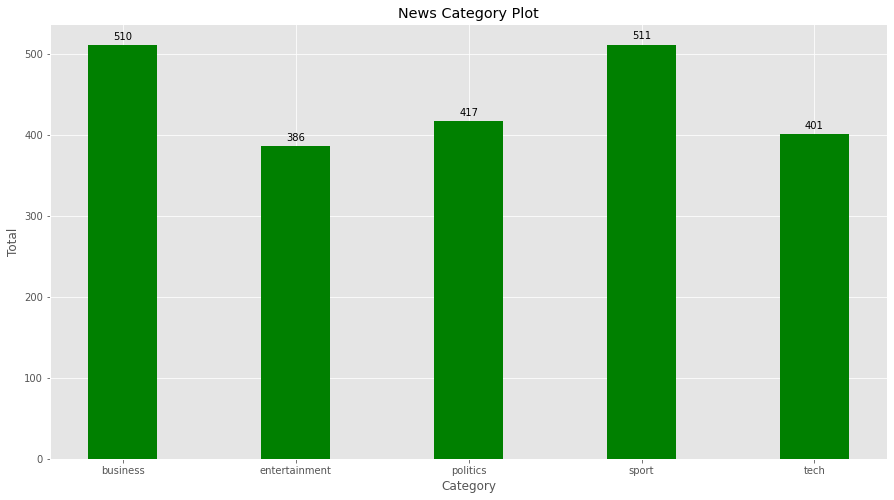

In [14]:
plt.style.use('ggplot')

x_pos = [1,3,5,7,9]

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x_pos, counts, color='green')
plt.xlabel("Category")
plt.ylabel("Total")
plt.title("News Category Plot")
autolabel(rects1)

plt.xticks(x_pos, columns, fontsize=10)

plt.show()

## Data Preparation

## Split Data

In [15]:
articles = df['text'].values
category = df[columns].values

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(articles, category, test_size=0.2)

In [17]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1780
1780
445
445


### Tokenized Word

In [18]:
embedding_dim = 100 #Set embedding dim
max_length = 200 #Set maximum word length
trunc_type = 'post' #Truncate sentences after senteces 200 reached
padding_type = 'post' #Pad 0 after the sentences
oov_tok = '<oov>' #Out of vocabulary replacement

In [19]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)

In [20]:
word_index = tokenizer.word_index
print(len(word_index))
dict(list(word_index.items())[0:10])

29727


{'<oov>': 1,
 'a': 6,
 'and': 5,
 'for': 9,
 'in': 7,
 'is': 10,
 'of': 4,
 's': 8,
 'the': 2,
 'to': 3}

### Add sequence to the word after tokenized

In [21]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

### Add padding to word

In [22]:
train_pad = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type) 
test_pad = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Check padding result and real article text

In [23]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_pad[0]))
print('---')
print(X_train[0])

shares rise on new man utd offer shares in manchester united closed up 4 75 on monday following a new offer from us tycoon malcolm glazer the board of the football club is expected to meet early this week to discuss the latest proposal which values the club at £800m 1 5bn manchester united revealed on sunday that it had received a detailed proposal from mr glazer which looks set to receive more serious scrutiny the club has previously rejected mr glazer s approaches out of hand but a senior source at the club told the bbc this time it s different supporters group shareholders united however urged the club to reject the new deal a spokesman for the shareholders united said i can t see any difference compared to mr glazer s previous proposals other than £200m less debt he isn t bringing any money into the club he ll use our money to buy it mr glazer s latest move is being led by mr glazer s two sons avi and joel according to the financial times a proposal was received by david gill unite

## Model Creation

### Create Pre-Trained Word Embedding

In [24]:
embeddings_index = {};
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs;

In [25]:
embeddings_matrix = np.zeros((len(word_index)+1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

### Implementation to model

In [33]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [32]:
class stopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.99):
      print("\nReached 99% Validation Accuracy, Stop training")
      self.model.stop_training = True

callbacks = stopTraining()

!rm -rf /content/logs/
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
history = model.fit(train_pad, Y_train, epochs=20, validation_data=(test_pad, Y_test), callbacks=[callbacks, tensorboard_callback])

Epoch 1/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3692 - accuracy: 0.4472 - val_loss: 0.8210 - val_accuracy: 0.7146
Epoch 2/20
56/56 [==============================] - 1s 19ms/step - loss: 0.7728 - accuracy: 0.7438 - val_loss: 0.5092 - val_accuracy: 0.8764
Epoch 3/20
56/56 [==============================] - 1s 19ms/step - loss: 0.7343 - accuracy: 0.7404 - val_loss: 0.6096 - val_accuracy: 0.8045
Epoch 4/20
56/56 [==============================] - 1s 19ms/step - loss: 0.6356 - accuracy: 0.7747 - val_loss: 0.4302 - val_accuracy: 0.8539
Epoch 5/20
56/56 [==============================] - 1s 19ms/step - loss: 0.4255 - accuracy: 0.8545 - val_loss: 0.4749 - val_accuracy: 0.8427
Epoch 6/20
56/56 [==============================] - 1s 19ms/step - loss: 0.4057 - accuracy: 0.8820 - val_loss: 0.3922 - val_accuracy: 0.8966
Epoch 7/20
56/56 [==============================] - 1s 18ms/step - loss: 0.3494 - accuracy: 0.8871 - val_loss: 0.2887 - val_accuracy: 0.8989
Epoch 8/20
56

In [ ]:
%tensorboard --logdir logs
# Please run this on google colab to see the output.

In [39]:
eval = model.evaluate(test_pad, Y_test, batch_size=8)
print("Final Model Loss = ", eval[0]*100, "%")
print("Final Model Accuracy = ", eval[1]*100, "%")

56/56 [==============================] - 0s 7ms/step - loss: 0.1629 - accuracy: 0.9506
Final Model Loss =  16.29057079553604 %
Final Model Accuracy =  95.05618214607239 %


In [48]:
preds = ["Cristiano Ronaldo just score a goal"]
p_seq = tokenizer.texts_to_sequences(preds)
p_pad = pad_sequences(p_seq, maxlen=max_length)
pred = model.predict(p_pad)
labels = columns

for label in labels:
  print(label, "confidence = ", pred[0][labels.index(label)]*100, "%")

print("\nPrediction = ", labels[np.argmax(pred)])

business confidence =  0.002067300010821782 %
entertainment confidence =  0.0007987211574800313 %
politics confidence =  0.0007784024091961328 %
sport confidence =  99.99591112136841 %
tech confidence =  0.00045541455619968474 %

Prediction =  sport
